Vasmos a cargar el dataset de AirBnB descargado de [aquí](https://public.opendatasoft.com/explore/dataset/airbnb-listings/export/?disjunctive.host_verifications&disjunctive.amenities&disjunctive.features&q=Madrid&dataChart=eyJxdWVyaWVzIjpbeyJjaGFydHMiOlt7InR5cGUiOiJjb2x1bW4iLCJmdW5jIjoiQ09VTlQiLCJ5QXhpcyI6Imhvc3RfbGlzdGluZ3NfY291bnQiLCJzY2llbnRpZmljRGlzcGxheSI6dHJ1ZSwiY29sb3IiOiJyYW5nZS1jdXN0b20ifV0sInhBeGlzIjoiY2l0eSIsIm1heHBvaW50cyI6IiIsInRpbWVzY2FsZSI6IiIsInNvcnQiOiIiLCJzZXJpZXNCcmVha2Rvd24iOiJyb29tX3R5cGUiLCJjb25maWciOnsiZGF0YXNldCI6ImFpcmJuYi1saXN0aW5ncyIsIm9wdGlvbnMiOnsiZGlzanVuY3RpdmUuaG9zdF92ZXJpZmljYXRpb25zIjp0cnVlLCJkaXNqdW5jdGl2ZS5hbWVuaXRpZXMiOnRydWUsImRpc2p1bmN0aXZlLmZlYXR1cmVzIjp0cnVlfX19XSwidGltZXNjYWxlIjoiIiwiZGlzcGxheUxlZ2VuZCI6dHJ1ZSwiYWxpZ25Nb250aCI6dHJ1ZX0%3D&location=16,41.38377,2.15774&basemap=jawg.streets)

![](descargar.png)

In [2]:
list.of.packages <- c("tidyverse","ggplot2", "GGally", "MASS","reshape2","dendextend","matrixStats","dbscan","cluster")
{
 new.packages <- list.of.packages[!(list.of.packages %in% installed.packages()[,"Package"])]
 if(length(new.packages)) install.packages(new.packages)
 lapply(list.of.packages, require, character.only = TRUE)
}
require (tidyverse)
require (reshape2)
require (ggplot2)
require(GGally)
require (MASS)
require (dendextend)
require (cluster)
require (dbscan)
require(matrixStats)


Loading required package: tidyverse
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.3.5     ✔ purrr   0.3.2
✔ tibble  3.1.6     ✔ dplyr   1.0.8
✔ tidyr   0.8.3     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Loading required package: GGally
Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2
Loading required package: MASS

Attaching package: ‘MASS’

The following object is masked from ‘package:dplyr’:

    select

Loading required package: reshape2

Attaching package: ‘reshape2’

The following object is masked from ‘package:tidyr’:

    smiths

Loading required package: dendextend

---------------------
Welcome to dendextend version 1.15.2
Type citation('den

[[1]]
[1] TRUE

[[2]]
[1] TRUE

[[3]]
[1] TRUE

[[4]]
[1] TRUE

[[5]]
[1] TRUE

[[6]]
[1] TRUE

[[7]]
[1] TRUE

[[8]]
[1] TRUE

[[9]]
[1] TRUE

In [3]:
airbnb<-read.csv("airbnb-listings.csv",sep = ';')
options(repr.plot.height=4,repr.plot.width=6,repr.plot.res = 300)

In [4]:
str(airbnb)

'data.frame':	14780 obs. of  89 variables:
 $ ID                            : int  15141125 9470166 17444981 3284565 499911 1346747 3097553 13440784 7818234 1386096 ...
 $ Listing.Url                   : Factor w/ 14780 levels "https://www.airbnb.com/rooms/1000198",..: 4589 14355 7499 9627 10878 2802 9511 2777 13142 3370 ...
 $ Scrape.ID                     : num  2.02e+13 2.02e+13 2.02e+13 2.02e+13 2.02e+13 ...
 $ Last.Scraped                  : Factor w/ 37 levels "2016-01-04","2016-04-02",..: 25 25 25 25 25 25 25 25 25 25 ...
 $ Name                          : Factor w/ 14376 levels "","\" La Nicoletta\". Madrid río. Perfecto para parejas",..: 10928 4427 4588 1105 218 8953 4179 5471 8382 4144 ...
 $ Summary                       : Factor w/ 13290 levels "","!!!-ATTENTION-!!!   HEARE YOU HAVE THE CHANCE FOR A LAST MINUTE BOOKING  ( SORT TERM BOOKING OR LONG TERM BOOKI"| __truncated__,..: 2846 6387 8885 800 1 9904 5002 3621 943 1 ...
 $ Space                         : Factor w/ 10175 

Vamos a quedarnos con las columnas de mayor interés:

'City','Room.Type','Neighbourhood','Accommodates','Bathrooms','Bedrooms','Beds','Price','Square.Feet','Guests.Included','Extra.People','Review.Scores.Rating','Latitude', 'Longitude'

In [5]:
airbnb2<- airbnb %>% dplyr::select('City','Room.Type','Neighbourhood','Accommodates','Bathrooms','Bedrooms','Beds','Price',
                  'Square.Feet','Guests.Included','Extra.People','Review.Scores.Rating',
                  'Latitude', 'Longitude')

str(airbnb2)


'data.frame':	14780 obs. of  14 variables:
 $ City                : Factor w/ 247 levels "","Alaró","Albert Park",..: 120 120 120 120 120 120 120 120 120 120 ...
 $ Room.Type           : Factor w/ 3 levels "Entire home/apt",..: 1 1 1 1 1 1 1 2 1 1 ...
 $ Neighbourhood       : Factor w/ 391 levels "","Acacias","Acton",..: 1 1 1 108 108 189 1 189 108 189 ...
 $ Accommodates        : int  2 4 4 2 5 4 2 2 4 2 ...
 $ Bathrooms           : num  1 1 1.5 1 1 1 1 1.5 1 1 ...
 $ Bedrooms            : int  0 1 1 1 2 1 1 1 1 1 ...
 $ Beds                : int  1 2 2 2 4 2 1 1 2 1 ...
 $ Price               : int  50 50 77 50 95 69 70 30 57 59 ...
 $ Square.Feet         : int  NA NA NA NA NA NA NA NA NA NA ...
 $ Guests.Included     : int  2 2 1 1 4 2 1 1 2 1 ...
 $ Extra.People        : int  15 25 0 20 0 18 0 0 8 0 ...
 $ Review.Scores.Rating: int  96 81 89 93 97 91 100 80 98 95 ...
 $ Latitude            : num  40.4 40.4 40.4 40.4 40.4 ...
 $ Longitude           : num  -3.71 -3.71 -3.71 -3.7 -3.7

Nos quedarmos solo con las entradas de Madrid para Room.Type=="Entire home/apt" y cuyo barrio (Neighbourhood) no está vacio ''
Podemos eliminar las siguientes columnas que ya no son necesarias:
"Room.Type",'City'

Llama a nuevo dataframe df_madrid.

In [6]:
df_madrid <- dplyr::filter(airbnb2, Room.Type == "Entire home/apt" & City == "Madrid" & Neighbourhood !="") %>% dplyr::select (-"Room.Type",-"City")
#str(df_madrid)


In [7]:
names(droplevels(df_madrid))

[1] "Neighbourhood"        "Accommodates"         "Bathrooms"           
 [4] "Bedrooms"             "Beds"                 "Price"               
 [7] "Square.Feet"          "Guests.Included"      "Extra.People"        
[10] "Review.Scores.Rating" "Latitude"             "Longitude"

In [8]:
str(df_madrid)

'data.frame':	5601 obs. of  12 variables:
 $ Neighbourhood       : Factor w/ 391 levels "","Acacias","Acton",..: 108 108 189 108 189 189 189 255 189 255 ...
 $ Accommodates        : int  2 5 4 4 2 14 2 5 4 5 ...
 $ Bathrooms           : num  1 1 1 1 1 2 1 3 1 2 ...
 $ Bedrooms            : int  1 2 1 1 1 3 1 3 1 2 ...
 $ Beds                : int  2 4 2 2 1 14 1 3 1 2 ...
 $ Price               : int  50 95 69 57 59 120 89 192 100 100 ...
 $ Square.Feet         : int  NA NA NA NA NA NA NA NA NA NA ...
 $ Guests.Included     : int  1 4 2 2 1 2 1 2 2 2 ...
 $ Extra.People        : int  20 0 18 8 0 18 10 12 12 15 ...
 $ Review.Scores.Rating: int  93 97 91 98 95 92 98 80 NA 95 ...
 $ Latitude            : num  40.4 40.4 40.4 40.4 40.4 ...
 $ Longitude           : num  -3.7 -3.7 -3.71 -3.7 -3.71 ...


In [9]:
summary(df_madrid)


     Neighbourhood   Accommodates      Bathrooms        Bedrooms     
 Malasaña   : 679   Min.   : 1.000   Min.   :0.000   Min.   : 0.000  
 Embajadores: 585   1st Qu.: 3.000   1st Qu.:1.000   1st Qu.: 1.000  
 La Latina  : 571   Median : 4.000   Median :1.000   Median : 1.000  
 Sol        : 536   Mean   : 4.101   Mean   :1.248   Mean   : 1.453  
 Cortes     : 441   3rd Qu.: 5.000   3rd Qu.:1.000   3rd Qu.: 2.000  
 Justicia   : 384   Max.   :16.000   Max.   :6.500   Max.   :10.000  
 (Other)    :2405                    NA's   :14      NA's   :7       
      Beds            Price         Square.Feet     Guests.Included 
 Min.   : 1.000   Min.   : 10.00   Min.   :   0.0   Min.   : 1.000  
 1st Qu.: 1.000   1st Qu.: 56.00   1st Qu.:   0.0   1st Qu.: 1.000  
 Median : 2.000   Median : 75.00   Median : 237.0   Median : 2.000  
 Mean   : 2.393   Mean   : 88.74   Mean   : 392.6   Mean   : 1.952  
 3rd Qu.: 3.000   3rd Qu.:100.00   3rd Qu.: 646.0   3rd Qu.: 2.000  
 Max.   :16.000   Max.   :

Crea una nueva columna llamada Square.Meters a partir de Square.Feet. Recuerda que un pie cuadrado son 0.092903 metros cuadrados.

In [10]:
df_madrid$Square.Meters <- df_madrid$Square.Feet * 0.092903

In [11]:
head(df_madrid)

Neighbourhood,Accommodates,Bathrooms,Bedrooms,Beds,Price,Square.Feet,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude,Square.Meters
Embajadores,2,1,1,2,50,NA,1,20,93,40.41126,-3.697305,NA
Embajadores,5,1,2,4,95,NA,4,0,97,40.41256,-3.701155,NA
La Latina,4,1,1,2,69,NA,2,18,91,40.40791,-3.705095,NA
Embajadores,4,1,1,2,57,NA,2,8,98,40.41162,-3.703281,NA
La Latina,2,1,1,1,59,NA,1,0,95,40.40734,-3.707019,NA
La Latina,14,2,3,14,120,NA,2,18,92,40.40908,-3.704744,NA


¿Que porcentaje de los apartamentos no muestran los metros cuadrados? Es decir, ¿cuantos tienen NA en Square.Meters?

In [12]:
sum_na_m2<- function (x) {sum(is.na(x))}
Porcentaje1 <- round(100*(sum_na_m2(df_madrid$Square.Meters)/nrow(df_madrid)),2)
print(Porcentaje1)

[1] 93.8


De todos los apartamentos que tienen un valor de metros cuadrados diferente de NA 
¿Que porcentaje de los apartamentos tienen 0 metros cuadrados?

In [13]:
sum_total <- sum(!is.na(df_madrid$Square.Meters))
sum_cero <-sum(df_madrid$Square.Meters==0,na.rm= TRUE)
Porcentaje2<-round(100*sum_cero/sum_total,2)
Porcentaje2



[1] 36.89

Reemplazar todos los 0m^2 por NA 

In [14]:
df_madrid$Square.Meters[df_madrid$Square.Meters==0] = NA

Son muchos, vamos a intentar crear un modelo que nos prediga cuantos son los metros cuadrados en función del resto de variables para tratar de rellenar esos NA. Pero **antes de crear el modelo** vamos a hacer:
* pintar el histograma de los metros cuadrados y ver si tenemos que filtrar algún elemento más.
* crearemos una variable sintética nueva basada en la similitud entre barrios que usaremos en nuestro modelo.

Pinta el histograma de los metros cuadrados y ver si tenemos que filtrar algún elemento más

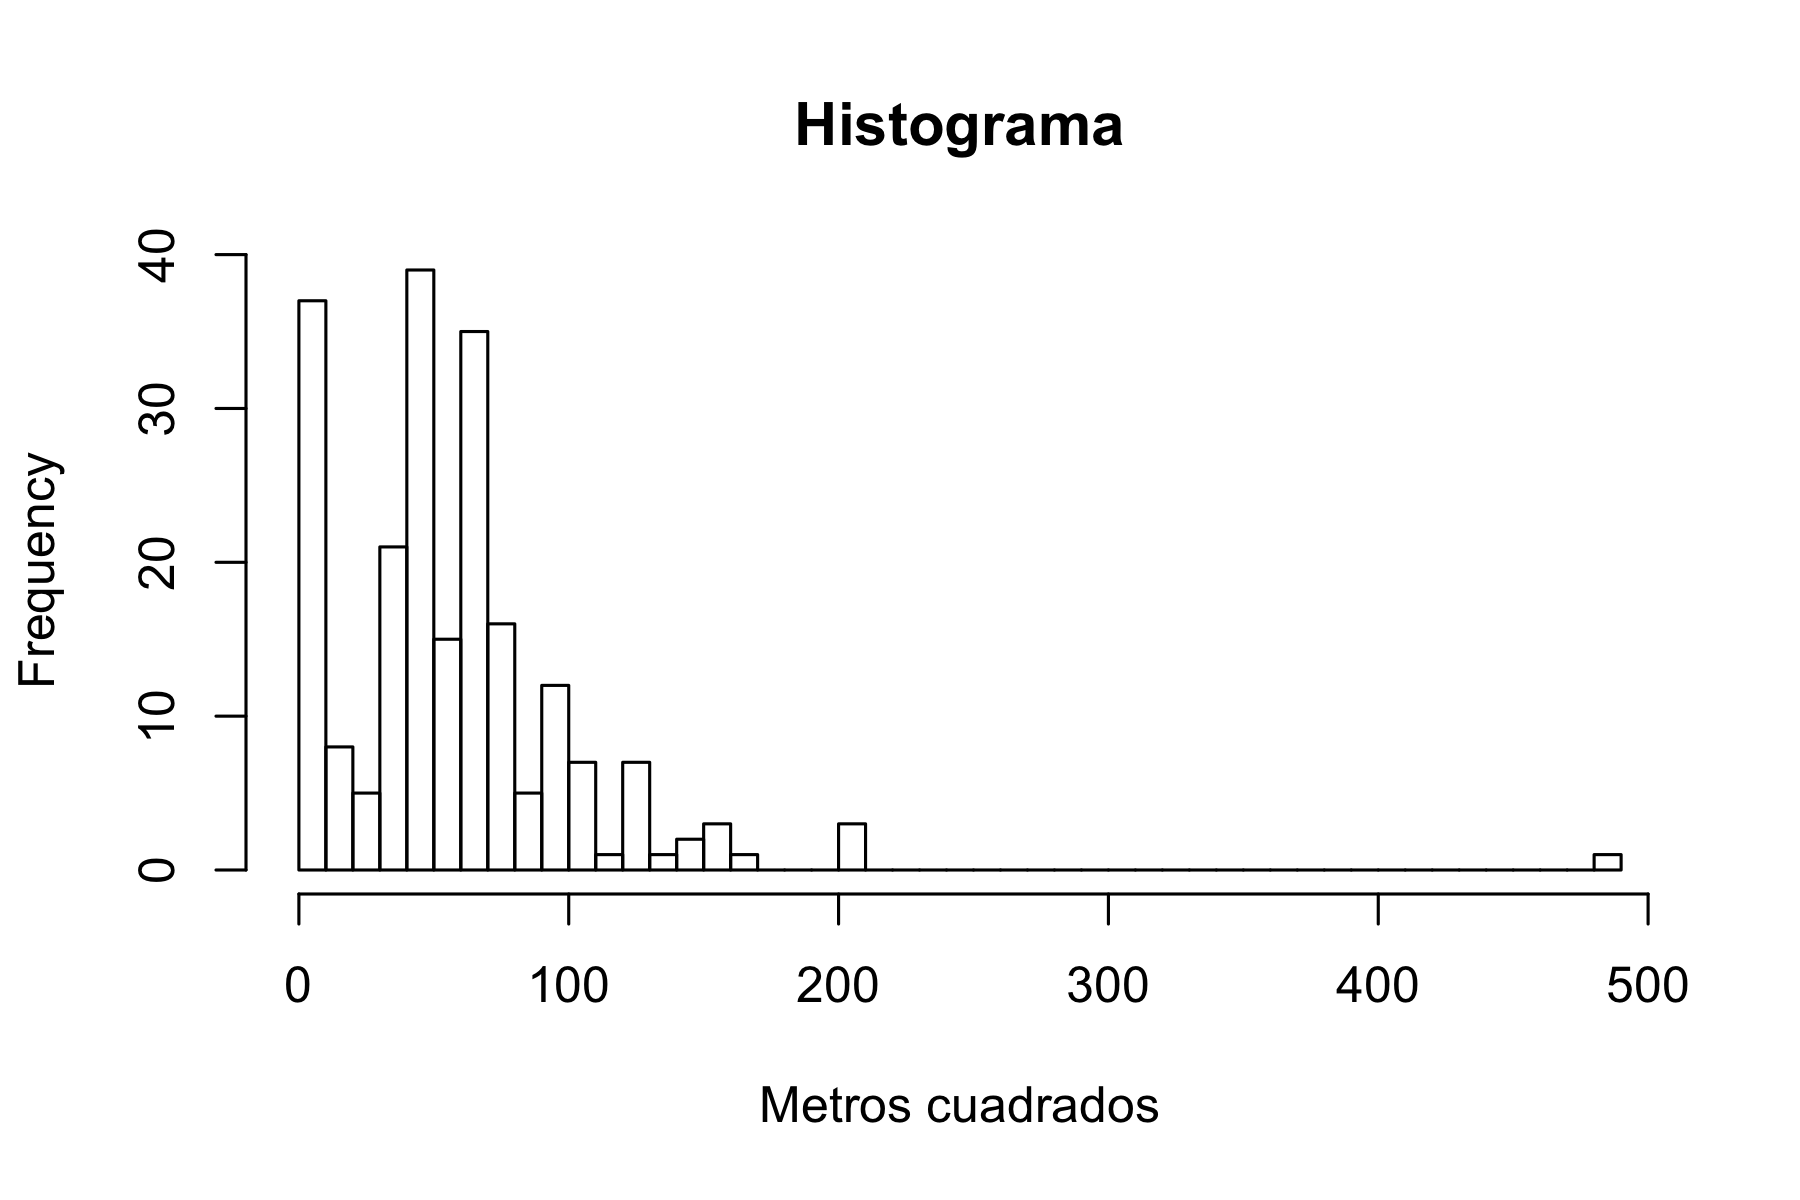

In [15]:
hist(na.omit(df_madrid$Square.Meters), main = "Histograma", xlab = "Metros cuadrados", breaks=40)

Asigna el valor NA a la columna Square.Meters de los apartamentos que tengan menos de 20 m^2

In [16]:
df_madrid$Square.Meters[which(df_madrid$Square.Meters<20)]=NA

Del histograma se observa que existe unos valores anormales para los pisos que son mayores de 200m2 por eso también lo eliminamos. Ya que eliminando los menores de 20 y los mayores de 200 si que sigue una campana de gauss

In [17]:
df_madrid$Square.Meters[which(df_madrid$Square.Meters>199)]=NA

Existen varios Barrios que todas sus entradas de Square.Meters son NA, vamos a eliminar del dataset todos los pisos que pertenecen a estos barrios.

In [18]:
df_barrios <- df_madrid %>% group_by(Neighbourhood) %>%
  summarise(pisos_na=(sum(is.na((Square.Meters)))),Total_pisos =n(), Diferencia =sum(is.na((Square.Meters)))-n()) 

df_barrios_eliminar<-df_barrios %>% filter(Diferencia == 0) %>% dplyr::select(Neighbourhood)
df_barrios_eliminar

Neighbourhood
Aluche
Arganzuela
Atocha
Bellas Vistas
Berruguete
Castillejos
Delicias
Estrella
Fuencarral-El Pardo
Fuencarral-el Pardo


In [19]:
df_madrid2<- df_madrid[!df_madrid$Neighbourhood %in% df_barrios_eliminar$Neighbourhood,]%>% droplevels()


In [20]:
summary(df_madrid2$Square.Meters)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  22.02   44.97   60.02   66.22   78.73  165.00    4694 

El barrio parece ser un indicador importante para los metros cuadrados de un apartamento.

Vamos a agrupar los barrios por metros cuadrados. Podemos usar una matriz de similaridad de Tukey tal y como hicimos en el curso de estadística:

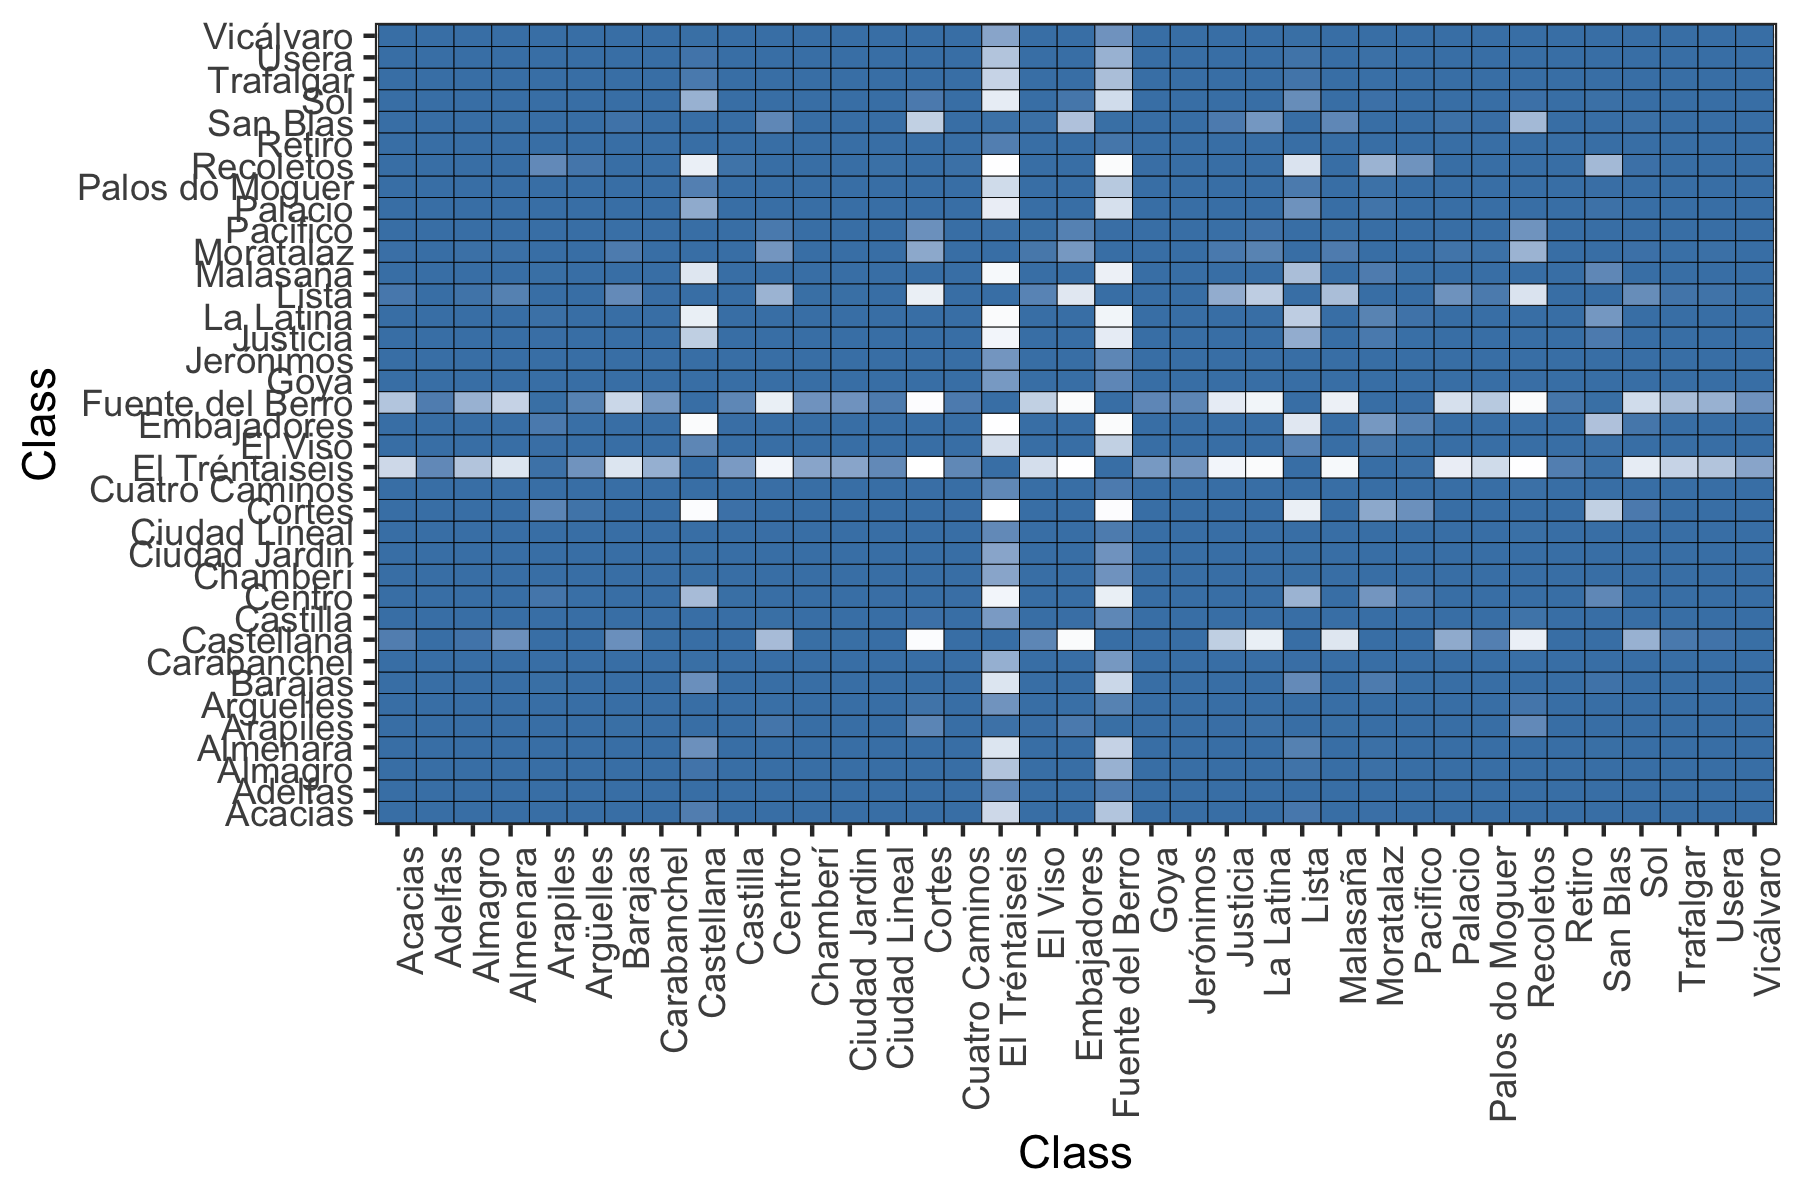

In [21]:
tky<-TukeyHSD(aov( formula=Square.Meters~Neighbourhood, data=df_madrid2 ))
tky.result<-data.frame(tky$Neighbourhood)
cn <-sort(unique(df_madrid2$Neighbourhood))
resm <- matrix(NA, length(cn),length(cn))
rownames(resm) <- cn
colnames(resm) <- cn
resm[lower.tri(resm) ] <- round(tky.result$p.adj,4)
resm[upper.tri(resm) ] <- t(resm)[upper.tri(resm)] 
diag(resm) <- 1
library(ggplot2)
library(reshape2)
dfResm <- melt(resm)
ggplot(dfResm, aes(x=Var1, y=Var2, fill=value))+
  geom_tile(colour = "black")+
  scale_fill_gradient(low = "white",high = "steelblue")+
  ylab("Class")+xlab("Class")+theme_bw()+
  theme(axis.text.x = element_text(angle = 90, hjust = 1),legend.position="none")

Usando como variable de distancia: 1-resm
Dibuja un dendrograma de los diferentes barrios.

In [22]:
d <- dist(1-resm,method= "euclidean")
d
barrios_clust <- hclust(d, method = "complete")

                    Acacias    Adelfas    Almagro   Almenara   Arapiles
Adelfas          0.76065934                                            
Almagro          0.20152682 0.56800156                                 
Almenara         0.19862029 0.91335518 0.38635139                      
Arapiles         1.01828664 0.37565568 0.83901364 1.15710177           
Argüelles        0.68132878 0.11653356 0.48912250 0.83740099 0.38580145
Barajas          0.26625486 0.95487058 0.43868286 0.12474017 1.19360759
Carabanchel      0.43167732 0.34239293 0.23405519 0.60386642 0.63385875
Castellana       2.57574695 2.38838276 2.50863226 2.63452001 2.16878753
Castilla         0.61684154 0.15921407 0.42282040 0.77667464 0.45503203
Centro           0.79486976 1.36177782 0.94012006 0.63202871 1.56104877
Chamberí         0.50410020 0.26312993 0.30746471 0.67009660 0.56866872
Ciudad Jardin    0.50410020 0.26312993 0.30746471 0.67009660 0.56866872
Ciudad Lineal    0.76409897 0.01655657 0.57147444 0.91680752 0.3

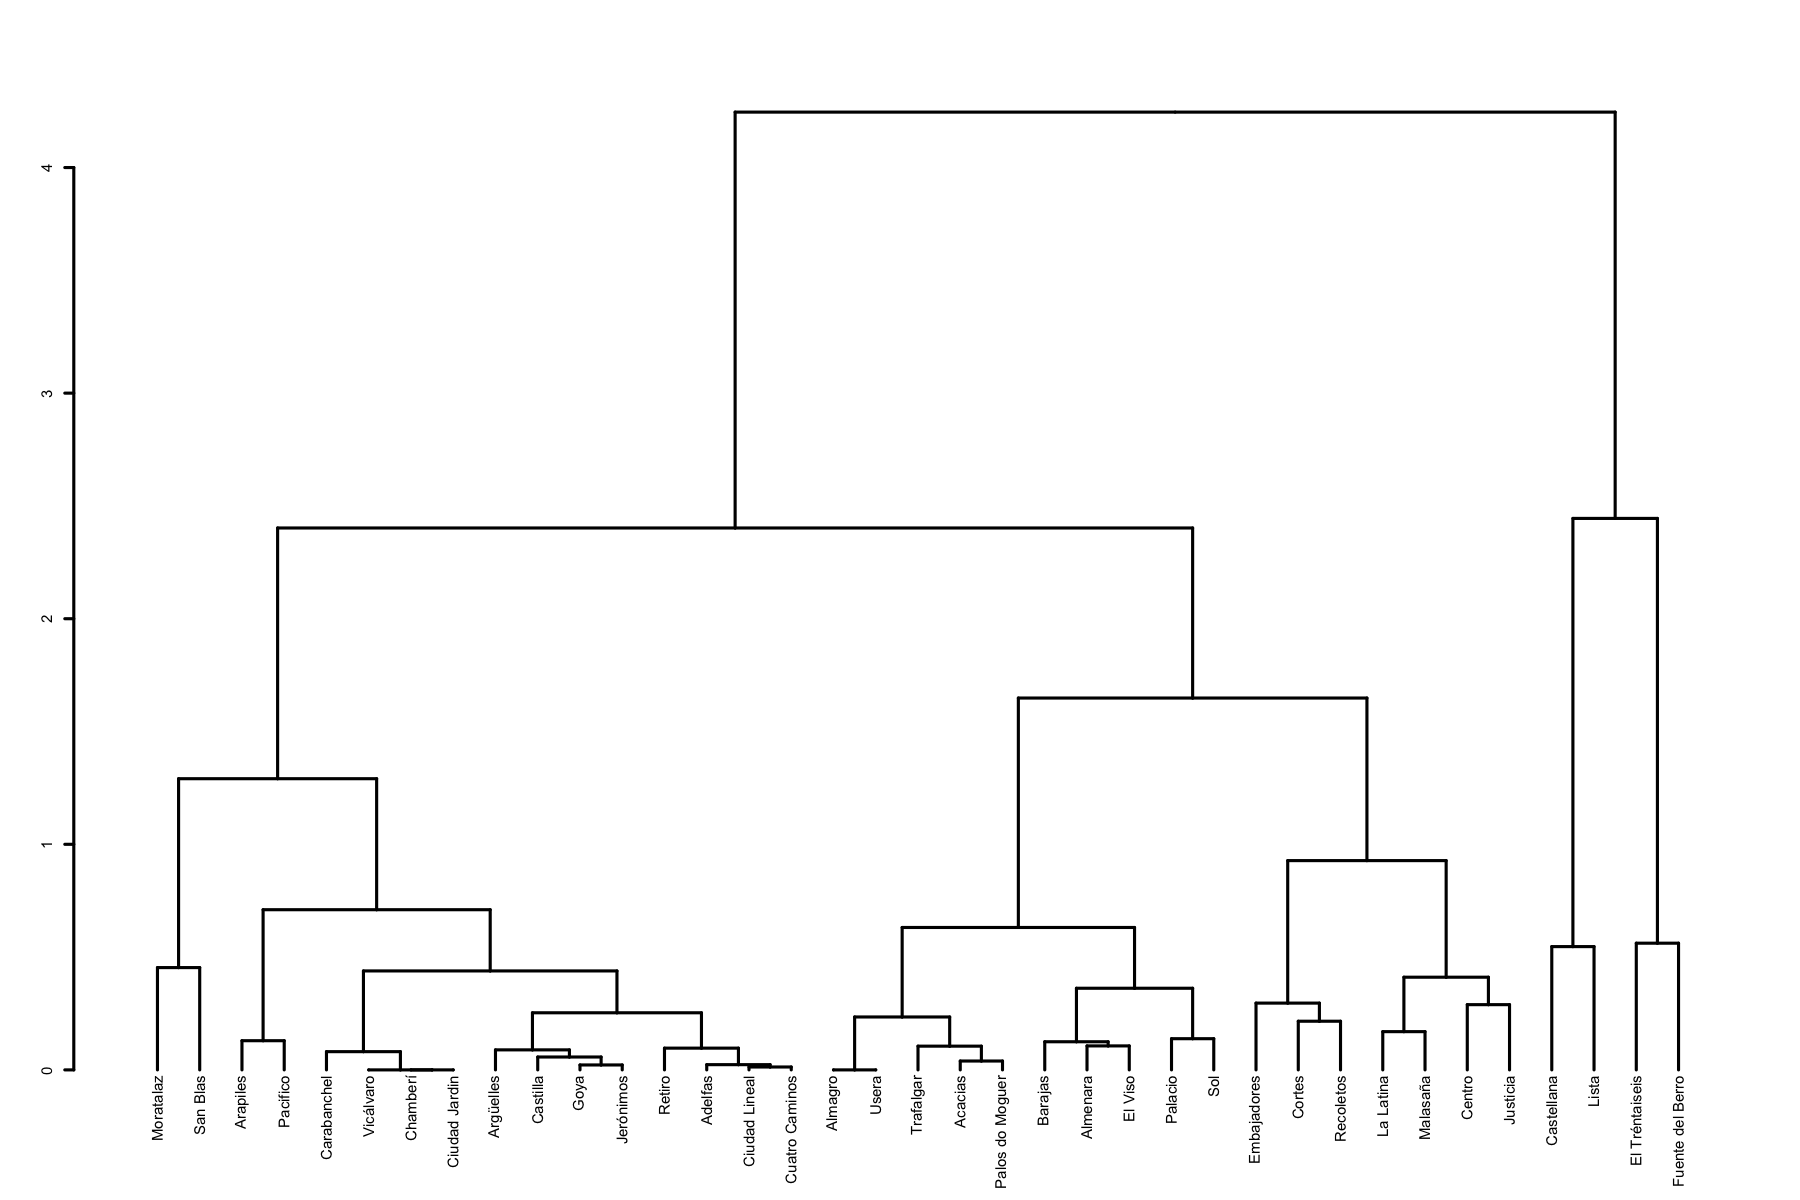

In [23]:
barrios_dendo <-  as.dendrogram(barrios_clust)
par(cex=0.3)
plot(barrios_dendo)

¿Que punto de corte sería el aconsejable?, ¿cuantos clusters aparecen?

In [24]:
barrios_dendo

'dendrogram' with 2 branches and 37 members total, at height 4.245756 

integer(0)

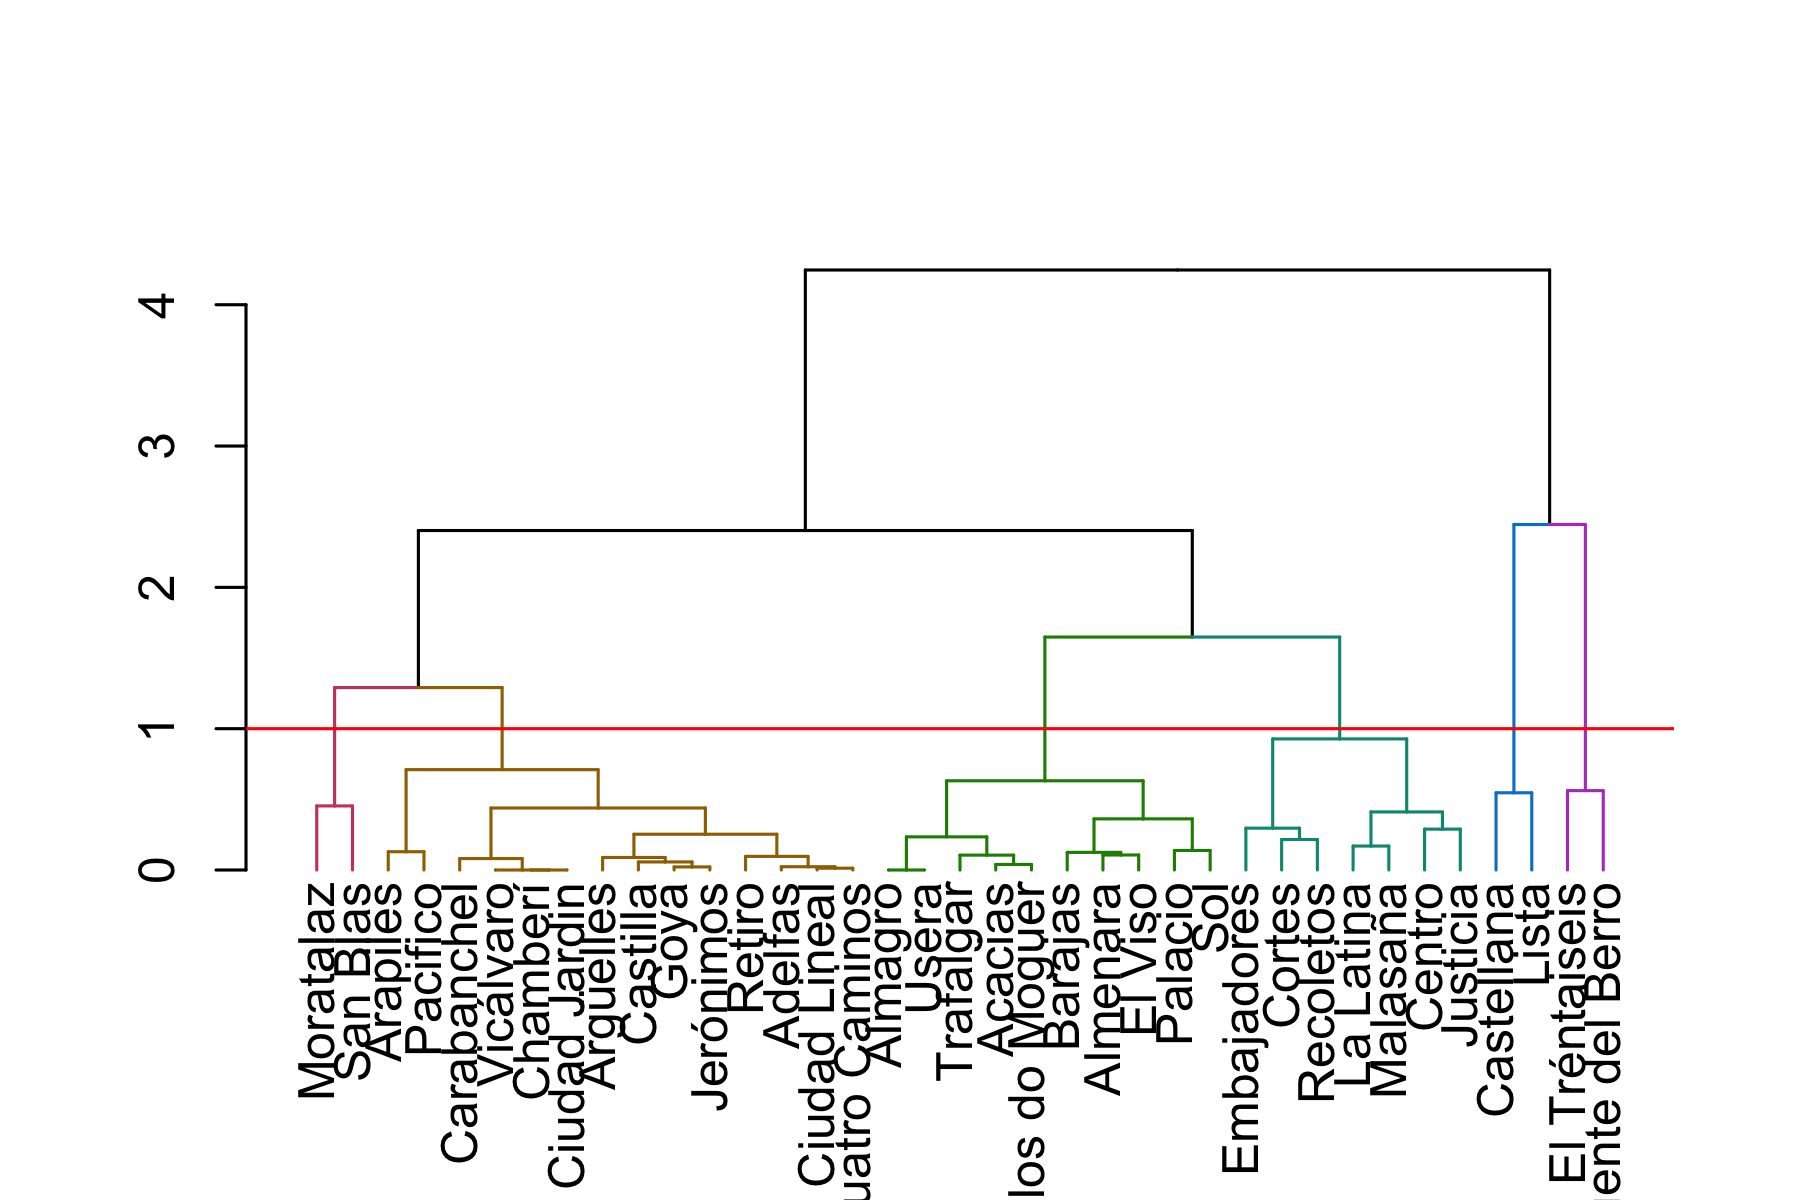

In [25]:
library(dendextend)

clusters = cutree_1h.dendrogram(barrios_dendo, h=1)
plot(color_branches(barrios_dendo, h=1))+abline(h=1,col="red")

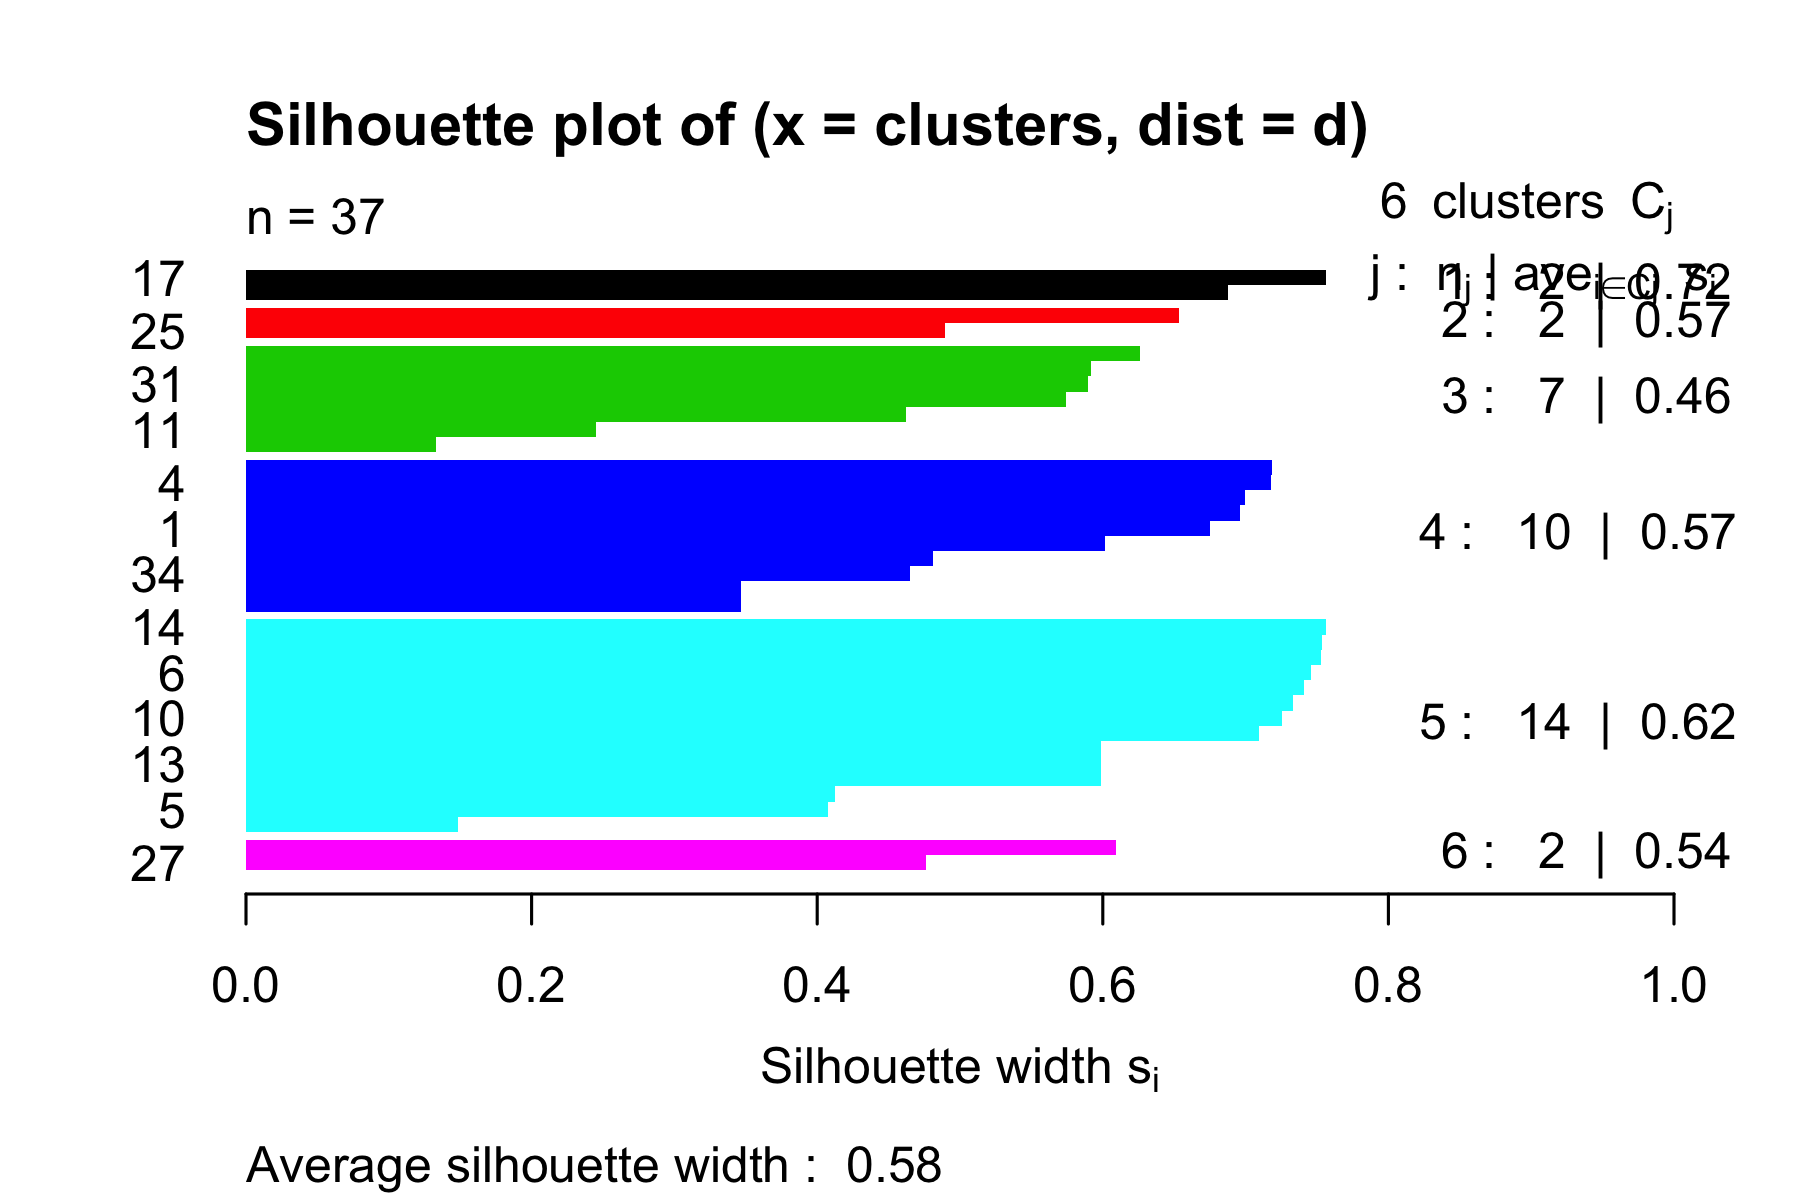

In [26]:
ss<- silhouette(clusters,d)
plot(ss,col=1:max(clusters),border=NA)

In [27]:
table(cn,cutree_1h.dendrogram(barrios_dendo, h=1))

                  
cn                 1 2 3 4 5 6
  Acacias          0 0 0 1 0 0
  Adelfas          0 0 0 0 1 0
  Almagro          0 0 0 1 0 0
  Almenara         0 0 0 1 0 0
  Arapiles         0 0 0 0 1 0
  Argüelles        0 0 0 0 1 0
  Barajas          0 0 0 1 0 0
  Carabanchel      0 0 0 0 1 0
  Castellana       0 1 0 0 0 0
  Castilla         0 0 0 0 1 0
  Centro           0 0 1 0 0 0
  Chamberí         0 0 0 0 1 0
  Ciudad Jardin    0 0 0 0 1 0
  Ciudad Lineal    0 0 0 0 1 0
  Cortes           0 0 1 0 0 0
  Cuatro Caminos   0 0 0 0 1 0
  El Tréntaiseis   1 0 0 0 0 0
  El Viso          0 0 0 1 0 0
  Embajadores      0 0 1 0 0 0
  Fuente del Berro 1 0 0 0 0 0
  Goya             0 0 0 0 1 0
  Jerónimos        0 0 0 0 1 0
  Justicia         0 0 1 0 0 0
  La Latina        0 0 1 0 0 0
  Lista            0 1 0 0 0 0
  Malasaña         0 0 1 0 0 0
  Moratalaz        0 0 0 0 0 1
  Pacifico         0 0 0 0 1 0
  Palacio          0 0 0 1 0 0
  Palos do Moguer  0 0 0 1 0 0
  Recoletos        0

Se han seleccionado 6 cluster, ya que el corte se ha realizado para h=1. Y se el asigna a cada barrio su identificador de cluster

Vamos a crear una nueva columna en el dataframe df_madrid con un nuevo identificador marcado por los clusters obtenidos. Esta columna la llamaremos neighb_id

In [28]:
df_cluster = as.data.frame(clusters)
df_cluster
names(df_cluster)="neighb_id"
df_cluster$Neighbourhood=row.names(df_cluster)
df_cluster
df_madrid3 <- merge(df_madrid2, df_cluster, by = "Neighbourhood")
#df_madrid3$neighb_id<-(df_madrid3$neighb_id.x)


,clusters
Acacias,4
Adelfas,5
Almagro,4
Almenara,4
Arapiles,5
Argüelles,5
Barajas,4
Carabanchel,5
Castellana,2
Castilla,5


,neighb_id,Neighbourhood
Acacias,4,Acacias
Adelfas,5,Adelfas
Almagro,4,Almagro
Almenara,4,Almenara
Arapiles,5,Arapiles
Argüelles,5,Argüelles
Barajas,4,Barajas
Carabanchel,5,Carabanchel
Castellana,2,Castellana
Castilla,5,Castilla


In [29]:
df_madrid3 <-df_madrid3 %>% dplyr::select(!c(Square.Feet))

In [30]:
summary(df_madrid3)

     Neighbourhood   Accommodates      Bathrooms        Bedrooms     
 Malasaña   : 679   Min.   : 1.000   Min.   :0.000   Min.   : 0.000  
 Embajadores: 585   1st Qu.: 3.000   1st Qu.:1.000   1st Qu.: 1.000  
 La Latina  : 571   Median : 4.000   Median :1.000   Median : 1.000  
 Sol        : 536   Mean   : 4.092   Mean   :1.244   Mean   : 1.418  
 Cortes     : 441   3rd Qu.: 5.000   3rd Qu.:1.000   3rd Qu.: 2.000  
 Justicia   : 384   Max.   :16.000   Max.   :6.000   Max.   :10.000  
 (Other)    :1668                    NA's   :14      NA's   :7       
      Beds            Price        Guests.Included   Extra.People    
 Min.   : 1.000   Min.   : 18.00   Min.   : 1.000   Min.   :  0.000  
 1st Qu.: 1.000   1st Qu.: 59.00   1st Qu.: 1.000   1st Qu.:  0.000  
 Median : 2.000   Median : 75.00   Median : 2.000   Median : 10.000  
 Mean   : 2.366   Mean   : 90.45   Mean   : 1.955   Mean   :  9.029  
 3rd Qu.: 3.000   3rd Qu.:100.00   3rd Qu.: 2.000   3rd Qu.: 15.000  
 Max.   :16.000   Ma

Vamos a crear dos grupos, uno test y otro train.

Tratamos de predecir los metros cuadrados en función del resto de columnas del dataframe.

In [31]:
df_madrid4 = df_madrid3[!is.na(df_madrid3$Square.Meters),]
df_madrid4<-na.omit(df_madrid4)

In [32]:
idx<-sample(1:nrow(df_madrid4),nrow(df_madrid4)*0.7)
df_madrid4.train<-df_madrid4[idx,]
df_madrid4.test <-df_madrid4[-idx,]
summary(df_madrid4.train)
summary(df_madrid4.test)

     Neighbourhood  Accommodates      Bathrooms        Bedrooms    
 Sol        :22    Min.   : 2.000   Min.   :1.000   Min.   :0.000  
 Malasaña   :15    1st Qu.: 4.000   1st Qu.:1.000   1st Qu.:1.000  
 Embajadores:14    Median : 4.000   Median :1.000   Median :1.000  
 La Latina  :12    Mean   : 4.429   Mean   :1.214   Mean   :1.518  
 Cortes     : 6    3rd Qu.: 6.000   3rd Qu.:1.000   3rd Qu.:2.000  
 Almenara   : 4    Max.   :10.000   Max.   :3.000   Max.   :5.000  
 (Other)    :39                                                    
      Beds           Price        Guests.Included  Extra.People  
 Min.   :1.000   Min.   : 30.00   Min.   :1.000   Min.   : 0.00  
 1st Qu.:1.000   1st Qu.: 59.00   1st Qu.:2.000   1st Qu.: 0.00  
 Median :2.000   Median : 71.50   Median :2.000   Median :10.00  
 Mean   :2.625   Mean   : 83.23   Mean   :2.134   Mean   :10.61  
 3rd Qu.:3.000   3rd Qu.: 95.00   3rd Qu.:2.000   3rd Qu.:15.00  
 Max.   :8.000   Max.   :500.00   Max.   :8.000   Max.   :45

     Neighbourhood  Accommodates      Bathrooms        Bedrooms   
 Malasaña   : 9    Min.   : 2.000   Min.   :1.000   Min.   :0.00  
 La Latina  : 8    1st Qu.: 3.000   1st Qu.:1.000   1st Qu.:1.00  
 Embajadores: 5    Median : 4.000   Median :1.000   Median :1.00  
 Justicia   : 4    Mean   : 4.265   Mean   :1.296   Mean   :1.51  
 Sol        : 4    3rd Qu.: 5.000   3rd Qu.:1.500   3rd Qu.:2.00  
 Cortes     : 3    Max.   :12.000   Max.   :4.000   Max.   :4.00  
 (Other)    :16                                                   
      Beds           Price       Guests.Included  Extra.People   
 Min.   :1.000   Min.   : 41.0   Min.   :1.000   Min.   : 0.000  
 1st Qu.:1.000   1st Qu.: 60.0   1st Qu.:1.000   1st Qu.: 0.000  
 Median :2.000   Median : 75.0   Median :2.000   Median :10.000  
 Mean   :2.551   Mean   :103.3   Mean   :2.102   Mean   : 8.796  
 3rd Qu.:3.000   3rd Qu.:100.0   3rd Qu.:2.000   3rd Qu.:15.000  
 Max.   :8.000   Max.   :500.0   Max.   :8.000   Max.   :50.000  
  

In [33]:
set.seed(123)
df_madrid4.train<-na.omit(df_madrid4.train)
model <- lm(Square.Meters ~ ., data=df_madrid4.train)
set.seed(123)
model_AIC <- stepAIC(model, steps = 10)
summary(model_AIC)

Start:  AIC=594.22
Square.Meters ~ Neighbourhood + Accommodates + Bathrooms + Bedrooms + 
    Beds + Price + Guests.Included + Extra.People + Review.Scores.Rating + 
    Latitude + Longitude + neighb_id


Step:  AIC=594.22
Square.Meters ~ Neighbourhood + Accommodates + Bathrooms + Bedrooms + 
    Beds + Price + Guests.Included + Extra.People + Review.Scores.Rating + 
    Latitude + Longitude

                       Df Sum of Sq   RSS    AIC
- Longitude             1      18.7 10676 592.42
- Latitude              1      26.2 10684 592.49
- Extra.People          1      32.1 10690 592.56
- Beds                  1     133.2 10791 593.61
<none>                              10658 594.22
- Review.Scores.Rating  1     278.7 10936 595.11
- Accommodates          1     285.1 10943 595.18
- Guests.Included       1     319.0 10977 595.52
- Price                 1     440.0 11098 596.75
- Bedrooms              1    2883.0 13541 619.03
- Neighbourhood        31   13447.3 24105 623.63
- Bathrooms     


Call:
lm(formula = Square.Meters ~ Neighbourhood + Accommodates + Bathrooms + 
    Bedrooms + Price + Guests.Included + Review.Scores.Rating, 
    data = df_madrid4.train)

Residuals:
    Min      1Q  Median      3Q     Max 
-34.362  -5.628   0.000   4.626  40.913 

Coefficients:
                               Estimate Std. Error t value Pr(>|t|)    
(Intercept)                    -2.02921   18.44333  -0.110  0.91269    
NeighbourhoodAdelfas          -36.69069   15.17849  -2.417  0.01810 *  
NeighbourhoodAlmagro          -24.26222   14.85949  -1.633  0.10676    
NeighbourhoodAlmenara          -4.63992   10.85879  -0.427  0.67040    
NeighbourhoodArapiles          20.69462   15.91569   1.300  0.19755    
NeighbourhoodArgüelles         -9.24756   12.45736  -0.742  0.46023    
NeighbourhoodBarajas          -30.84333   15.17599  -2.032  0.04570 *  
NeighbourhoodCarabanchel      -10.50338   12.28223  -0.855  0.39522    
NeighbourhoodCastilla          -9.38268   12.47706  -0.752  0.45444   

In [34]:
model_AIC$anova

Step,Df,Deviance,Resid. Df,Resid. Dev,AIC
,NA,NA,70,10657.66,594.2200
- neighb_id,0,0.00000,70,10657.66,594.2200
- Longitude,1,18.67705,71,10676.34,592.4161
- Latitude,1,13.86893,72,10690.21,590.5615
- Extra.People,1,31.15212,73,10721.36,588.8874
- Beds,1,136.09765,74,10857.46,588.3001


In [35]:
set.seed(123)

model_1 <- glm(Square.Meters ~ ., data=df_madrid4.train)
model_AIC_1 <- stepAIC(model_1, steps = 7)
summary(model_AIC_1)

Start:  AIC=914.06
Square.Meters ~ Neighbourhood + Accommodates + Bathrooms + Bedrooms + 
    Beds + Price + Guests.Included + Extra.People + Review.Scores.Rating + 
    Latitude + Longitude + neighb_id


Step:  AIC=914.06
Square.Meters ~ Neighbourhood + Accommodates + Bathrooms + Bedrooms + 
    Beds + Price + Guests.Included + Extra.People + Review.Scores.Rating + 
    Latitude + Longitude

                       Df Deviance    AIC
- Longitude             1    10676 912.26
- Latitude              1    10684 912.34
- Extra.People          1    10690 912.40
- Beds                  1    10791 913.45
<none>                       10658 914.06
- Review.Scores.Rating  1    10936 914.95
- Accommodates          1    10943 915.02
- Guests.Included       1    10977 915.36
- Price                 1    11098 916.59
- Bedrooms              1    13541 938.88
- Neighbourhood        31    24105 943.47
- Bathrooms             1    14532 946.79

Step:  AIC=912.26
Square.Meters ~ Neighbourhood + Accommo


Call:
glm(formula = Square.Meters ~ Neighbourhood + Accommodates + 
    Bathrooms + Bedrooms + Price + Guests.Included + Review.Scores.Rating, 
    data = df_madrid4.train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-34.362   -5.628    0.000    4.626   40.913  

Coefficients:
                               Estimate Std. Error t value Pr(>|t|)    
(Intercept)                    -2.02921   18.44333  -0.110  0.91269    
NeighbourhoodAdelfas          -36.69069   15.17849  -2.417  0.01810 *  
NeighbourhoodAlmagro          -24.26222   14.85949  -1.633  0.10676    
NeighbourhoodAlmenara          -4.63992   10.85879  -0.427  0.67040    
NeighbourhoodArapiles          20.69462   15.91569   1.300  0.19755    
NeighbourhoodArgüelles         -9.24756   12.45736  -0.742  0.46023    
NeighbourhoodBarajas          -30.84333   15.17599  -2.032  0.04570 *  
NeighbourhoodCarabanchel      -10.50338   12.28223  -0.855  0.39522    
NeighbourhoodCastilla          -9.38268   12.4770

In [36]:
model_AIC_1$anova

Step,Df,Deviance,Resid. Df,Resid. Dev,AIC
,NA,NA,70,10657.66,914.0622
- neighb_id,0,0.00000,70,10657.66,914.0622
- Longitude,1,18.67705,71,10676.34,912.2583
- Latitude,1,13.86893,72,10690.21,910.4037
- Extra.People,1,31.15212,73,10721.36,908.7296
- Beds,1,136.09765,74,10857.46,908.1424


No se selecciona la lineal generalizada porque tiene un mayor AIC

In [41]:
set.seed(123)
model_def <- lm(Square.Meters ~ Accommodates+Bathrooms + Bedrooms   + Price + Guests.Included , data=df_madrid4.train)
summary(model_def)


Call:
lm(formula = Square.Meters ~ Accommodates + Bathrooms + Bedrooms + 
    Price + Guests.Included, data = df_madrid4.train)

Residuals:
    Min      1Q  Median      3Q     Max 
-42.038  -9.145  -2.404   8.817  45.218 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -0.99841    4.78844  -0.209  0.83524    
Accommodates     3.88950    1.26580   3.073  0.00270 ** 
Bathrooms       24.95317    4.54448   5.491 2.76e-07 ***
Bedrooms        13.35035    2.50971   5.319 5.84e-07 ***
Price            0.09497    0.03285   2.891  0.00466 ** 
Guests.Included -4.37333    1.65499  -2.643  0.00948 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 15.29 on 106 degrees of freedom
Multiple R-squared:  0.7563,	Adjusted R-squared:  0.7449 
F-statistic: 65.81 on 5 and 106 DF,  p-value: < 2.2e-16


Al modelo que sale con menor AIC de la regresión lineal se le fueron quitando las variables que no eran significativas como Rating y Neighbourhood

In [42]:
df_madrid4.test$Square.Meters_est<-predict(model_def,df_madrid4.test)
df_madrid4.test

,Neighbourhood,Accommodates,Bathrooms,Bedrooms,Beds,Price,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude,Square.Meters,neighb_id,Square.Meters_est
33,Acacias,4,1.0,1,2,60,2,15,98,40.40513,-3.707726,49.98181,4,49.81477
153,Almenara,6,2.0,1,2,67,4,0,73,40.47335,-3.691577,60.01534,4,74.46508
215,Arapiles,4,1.0,1,2,65,1,0,96,40.43335,-3.705369,35.02443,5,54.66296
255,Argüelles,4,1.0,1,1,95,2,10,93,40.42486,-3.715140,79.98948,5,53.13879
426,Castellana,4,2.0,2,4,190,1,0,93,40.43080,-3.679928,109.99715,2,104.83799
480,Castilla,4,1.0,1,1,95,1,0,100,40.47298,-3.686766,56.02051,5,57.51212
519,Chamberí,2,1.0,1,1,49,1,0,91,40.43116,-3.712869,60.01534,5,45.36441
703,Cortes,2,1.0,1,2,60,2,0,92,40.41528,-3.698587,35.02443,3,42.03577
771,Cortes,4,1.0,1,3,59,2,10,88,40.41433,-3.701234,40.04119,3,49.71979
819,Cortes,6,2.0,2,4,500,4,15,96,40.41364,-3.697923,74.97272,3,128.93835


Mirad el histograma de los residuos sobre el conjunto de test para evaluar la calidad de vuestro modelo

In [43]:
set.seed(123)
model_def_test<- lm(Square.Meters ~ Accommodates + Bathrooms + Bedrooms + 
    Price + Guests.Included + Extra.People + Review.Scores.Rating + 
    Latitude, data=df_madrid4.test)


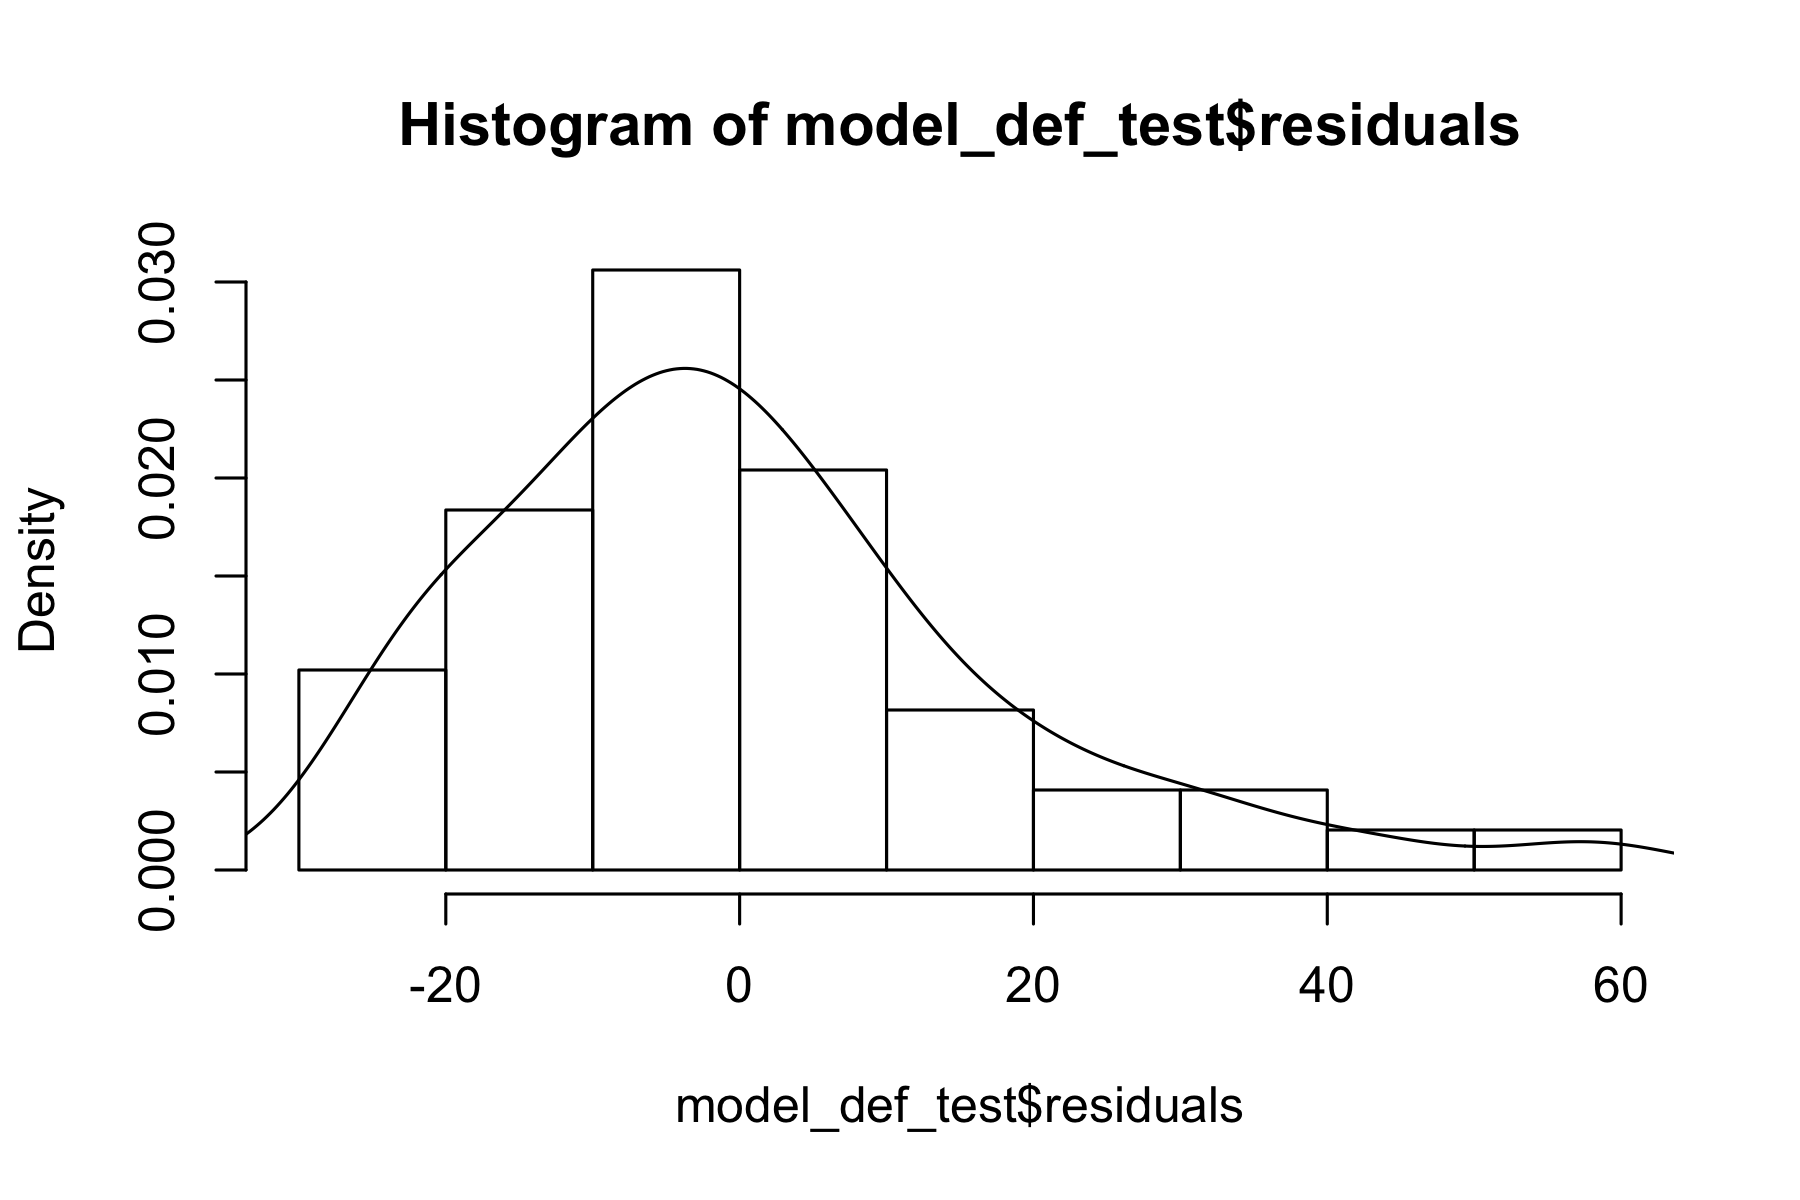

In [44]:
hist(model_def_test$residuals,prob = TRUE)
lines(density(model_def_test$residuals))

La representaciónn gráfica de los residuos se asemeja a una curva de gauss.

Si tuvieramos un anuncio de un apartamento para 6 personas (Accommodates), con 1 baño, con un precio de 80€/noche y 3 habitaciones en el barrio de Sol, con 3 camas y un review de 80.
¿Cuantos metros cuadrados tendría? Si tu modelo necesita algúna variable adicional puedes inventartela dentro del rango de valores del dataset.
¿Como varía sus metros cuadrados con cada habitación adicional?

In [45]:
data1 <- function( acco, bath, room, beds, prx, g_i, ex_pe, r_s_rat, lat, lon) {
  dataf1 = data.frame(
    "Accommodates" = acco,
    "Bathrooms" = bath,
    "Bedrooms" = room,
    "Beds" = beds,
    "Price" =prx,
    "Guests.Included" = g_i,
    "Extra.People" = ex_pe,
    "Review.Scores.Rating" = r_s_rat,
    "Latitude" =lat,
    "Longitude" =lon
  )
    return(dataf1)
}

In [46]:
metros_estimados <- predict(model_def, data1(6,1,3,3,80,3,10,95,40.41650,-3.707456))
metros_estimados

1 
81.82057

In [47]:
metros_estimados2 <- predict(model_def, data1(6,1,4,3,80,3,10,95,40.41650,-3.707456))
metros_estimados2-metros_estimados

1 
13.35035

Se ha añadido una habitación más para obtener cuanto varía el modelo en función de una habitación más y es enn 13,35m2

Rellenar los Square.Meters con valor NA con el estimado con el modelo anterior.

In [48]:
summary(df_madrid3$Square.Meters)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  22.02   44.97   60.02   66.22   78.73  165.00    4694 

In [49]:
df_madrid_NA<- df_madrid3 %>% dplyr::select(c(-1,-13)) %>% dplyr::filter (is.na(Square.Meters))

In [50]:
df_madrid_NA_noMeters<-df_madrid_NA[,-11]
names(droplevels(df_madrid_NA_noMeters))
df_madrid3[is.na(df_madrid3$Square.Meters),"Square.Meters"] <- predict(model_def,df_madrid_NA_noMeters)
summary(df_madrid3$Square.Meters)

[1] "Accommodates"         "Bathrooms"            "Bedrooms"            
 [4] "Beds"                 "Price"                "Guests.Included"     
 [7] "Extra.People"         "Review.Scores.Rating" "Latitude"            
[10] "Longitude"

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
 -15.77   46.39   53.43   64.81   76.03  324.67      22 

In [51]:
df_madrid3$Square.Meters[which(df_madrid3$Square.Meters<20)]=NA
df_madrid3$Square.Meters[which(df_madrid3$Square.Meters>199)]=NA
summary(df_madrid3$Square.Meters)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  22.02   46.39   53.24   64.10   75.45  195.83      47 

De los valores predichos de metros cuadrados se han quitado los que salen
menores a 20m2 y los superiores a 199m2. Ya que son valores que se considera
que existe algún tipo de error en los datos de partida que sirven para
realizar la proyección.

# Usar PCA para encontrar el apartamento más cercano a uno dado.

Este algoritmo nos ayudaría a dado un apartamento que el algoritmo nos devolvería los 5 apartamentos más similares.


Crearemos una función tal que le pasemos un apartamento con los siguientes datos:
* Accommodates	
* Bathrooms	
* Bedrooms	
* Beds	
* Price	
* Guests.Included	
* Extra.People	
* Review.Scores.Rating	
* Latitude	
* Longitude	
* Square.Meters

y nos devuelva los 5 más similares de:

In [52]:
df_madrid_PCA = na.omit(df_madrid3)
summary(df_madrid_PCA)

     Neighbourhood   Accommodates      Bathrooms        Bedrooms  
 Malasaña   : 594   Min.   : 1.000   Min.   :1.000   Min.   :0.0  
 Embajadores: 539   1st Qu.: 3.000   1st Qu.:1.000   1st Qu.:1.0  
 La Latina  : 498   Median : 4.000   Median :1.000   Median :1.0  
 Sol        : 480   Mean   : 4.097   Mean   :1.227   Mean   :1.4  
 Cortes     : 355   3rd Qu.: 5.000   3rd Qu.:1.000   3rd Qu.:2.0  
 Justicia   : 338   Max.   :16.000   Max.   :4.000   Max.   :6.0  
 (Other)    :1333                                                 
      Beds            Price        Guests.Included  Extra.People    
 Min.   : 1.000   Min.   : 18.00   Min.   : 1      Min.   :  0.000  
 1st Qu.: 1.000   1st Qu.: 57.00   1st Qu.: 1      1st Qu.:  0.000  
 Median : 2.000   Median : 74.00   Median : 2      Median : 10.000  
 Mean   : 2.357   Mean   : 85.69   Mean   : 2      Mean   :  9.339  
 3rd Qu.: 3.000   3rd Qu.: 99.00   3rd Qu.: 2      3rd Qu.: 15.000  
 Max.   :16.000   Max.   :500.00   Max.   :12     

In [53]:
PCA<- data.matrix(df_madrid_PCA)
data_PCA <- prcomp(PCA, center = TRUE, scale. = TRUE)
summary(data_PCA)
attributes(data_PCA)

Importance of components:
                          PC1    PC2     PC3    PC4     PC5     PC6     PC7
Standard deviation     2.1999 1.2500 1.05150 1.0115 0.98091 0.93444 0.82957
Proportion of Variance 0.3723 0.1202 0.08505 0.0787 0.07401 0.06717 0.05294
Cumulative Proportion  0.3723 0.4925 0.57752 0.6562 0.73023 0.79739 0.85033
                           PC8    PC9   PC10   PC11    PC12    PC13
Standard deviation     0.78356 0.7029 0.6171 0.5372 0.39605 0.10665
Proportion of Variance 0.04723 0.0380 0.0293 0.0222 0.01207 0.00087
Cumulative Proportion  0.89756 0.9356 0.9649 0.9871 0.99913 1.00000

$names
[1] "sdev"     "rotation" "center"   "scale"    "x"       

$class
[1] "prcomp"

Con las 6 primeras dimensiones se explica casi el 80% de los datos.

In [54]:
attributes(data_PCA)

$names
[1] "sdev"     "rotation" "center"   "scale"    "x"       

$class
[1] "prcomp"

In [55]:
data2 <- function( acco, bath, room, beds, prx, g_i, ex_pe, r_s_rat, lat, lon, met,neig,id) {
  data2 = data.frame(
    "Accommodates" = acco,
    "Bathrooms" = bath,
    "Bedrooms" = room,
    "Beds" = beds,
    "Price" =prx,
    "Guests.Included" = g_i,
    "Extra.People" = ex_pe,
    "Review.Scores.Rating" = r_s_rat,
    "Latitude" =lat,
    "Longitude" =lon,
    "Square.Meters"= met,
    "Neighbourhood"=neig,
    "neighb_id"= id
  )
    return(data2)
}

In [63]:
iguales_pca = predict(data_PCA, data.matrix(data2(6,1,3,3,80,3,10,95,40.41650,-3.707456,90,"Sol",4)))
dista = data.matrix(dist(rbind(iguales_pca, data_PCA$x), method="euclidean"))
#dista

In [64]:
dista2 <- as.data.frame(dista)
#summary(dista2)

In [65]:
cercanos <- dista2[order(dista2$V1, decreasing = FALSE),]
head(cercanos, 6)

,V1,1,2,3,4,5,6,7,8,9,...,4848,4849,4852,4854,4855,4856,4859,4860,4861,4862
,0.000000,3.443098,5.343846,3.673903,1.848100,3.229411,4.306182,4.401568,2.031545,4.327822,...,6.820801,6.480698,6.116986,7.328900,7.039427,5.550406,7.541169,9.862744,8.735506,8.917731
4,1.848100,2.660571,4.446804,2.886340,0.000000,1.951018,3.264746,3.430298,1.603599,3.411414,...,6.176506,6.340928,5.160113,6.382106,6.007560,5.383337,6.557107,9.548114,8.331475,8.860730
8,2.031545,2.187446,4.196156,2.750947,1.603599,2.252612,3.261714,3.497625,0.000000,3.480201,...,5.833256,6.314929,5.228145,6.121472,5.899130,5.186424,6.413491,9.387095,8.126776,8.751223
260,2.228060,3.331086,4.833768,3.502050,2.678549,3.228639,3.911280,4.118476,2.229608,3.993651,...,6.545030,6.831411,5.750658,6.609305,6.510901,5.622578,6.850433,9.527898,8.183242,8.755074
337,2.251003,3.331387,4.763581,3.412859,2.729652,3.255515,3.918853,4.067332,2.339362,3.947768,...,6.661655,6.966091,5.806050,6.643174,6.612972,5.626142,6.865217,9.741597,8.203641,8.796305
227,2.360390,3.295028,4.801851,3.490934,2.608267,3.158945,3.894079,4.151808,2.078567,4.054005,...,6.337107,6.769679,5.613230,6.473939,6.334491,5.587416,6.738066,9.350012,8.178672,8.768183


Se ha realizado la matriz de distancias con la propiedad a evaluar y se seleccion la primera columna. Como el cero es la distancia con sigo mismo. Los más proximos al dato dado es con la
propiedad 4, 8 ,260, 337 y 227


Bonus: ¿de todas las coordenadas PCA cual es la que mejor permite clasificar por id de barrio?

¿Por qué?

In [53]:
data_PCA$rotation <- -1*data_PCA$rotation
data_PCA$rotation

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
Neighbourhood,-0.02075521,-0.25642139,0.23145708,-0.15665203,-0.909959467,0.058654505,-0.11932424,0.019628467,0.05525013,-0.06512109,0.04438093,0.018759457,-7.628437e-07
Accommodates,-0.39941262,-0.07280276,-0.07026096,0.14285381,-0.012581573,-0.034886614,-0.17030057,0.200805694,0.09964867,0.30929979,0.16372161,-0.778918248,-3.208856e-03
Bathrooms,-0.35266380,0.04367312,-0.11106992,-0.19885000,-0.001309146,0.086899360,0.27857736,-0.334642445,-0.25523787,-0.22739044,0.69498755,0.021746531,1.560946e-01
Bedrooms,-0.40237295,0.01775320,-0.15104229,-0.03679437,0.021793304,-0.045343467,-0.12511339,0.032768354,0.31776964,-0.44482990,-0.33693130,0.039681467,6.167711e-01
Beds,-0.38315958,-0.04423742,-0.12665810,0.07886578,0.009395856,-0.046613901,-0.23156215,0.186184603,0.24212069,0.50463908,0.23553653,0.607959905,-6.862615e-03
Price,-0.33737460,-0.02779751,-0.06137376,-0.21954114,-0.083013266,0.175263969,0.38506127,-0.286585389,-0.29362120,0.44430191,-0.52900016,0.003779730,4.422161e-02
Guests.Included,-0.29351533,-0.11058874,0.28505790,0.30280002,0.059824070,-0.038979546,-0.21015800,0.327143739,-0.71092579,-0.20285071,-0.09349257,0.130599918,-4.918139e-03
Extra.People,-0.14257064,-0.14613822,0.68216167,0.44112306,0.114796722,-0.040566852,0.28360040,-0.311747367,0.31946196,0.02769923,0.02986526,0.021696628,4.192494e-02
Review.Scores.Rating,-0.04202302,-0.10801728,0.49524597,-0.74676343,0.288848998,-0.213793344,-0.11367061,0.175742483,0.03393174,0.06942524,0.03402227,-0.036051880,4.760147e-02
Latitude,-0.03060603,0.58791777,0.20551619,-0.01394470,-0.117870400,0.361754507,0.38658364,0.545285208,0.09506416,0.01065396,0.05806618,0.009659549,8.262137e-02


El PC2 ya que es donde el valor de la rotaciónn tiene un mayor valor positivo